<a href="https://colab.research.google.com/github/gomathisenthil/gomathi_114A78B2C26D787A79340BF0A2E21866/blob/main/New_solar_power_generation_forecasting_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SOLAR POWER GENERATION FORECASTING

Enter the date (YYYY-MM-DD): 2025-04-03


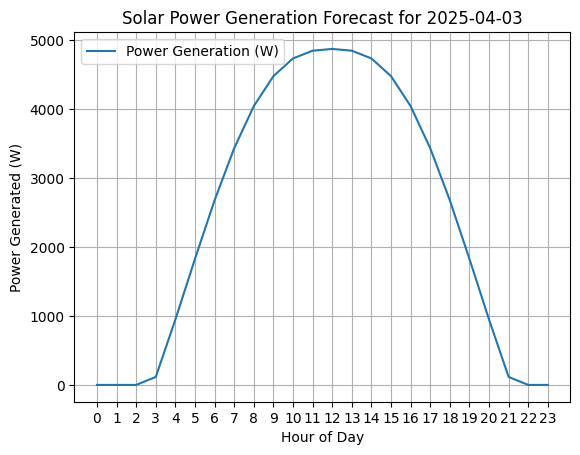

Solar Power Generation for 2025-04-03 (Day 93 of the year):
Hour 0: 0.00 W
Hour 1: 0.00 W
Hour 2: 0.00 W
Hour 3: 115.61 W
Hour 4: 947.97 W
Hour 5: 1827.84 W
Hour 6: 2678.10 W
Hour 7: 3433.38 W
Hour 8: 4043.47 W
Hour 9: 4478.41 W
Hour 10: 4735.67 W
Hour 11: 4847.68 W
Hour 12: 4873.60 W
Hour 13: 4847.68 W
Hour 14: 4735.67 W
Hour 15: 4478.41 W
Hour 16: 4043.47 W
Hour 17: 3433.38 W
Hour 18: 2678.10 W
Hour 19: 1827.84 W
Hour 20: 947.97 W
Hour 21: 115.61 W
Hour 22: 0.00 W
Hour 23: 0.00 W


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from math import radians, cos, sin


solar_panel_efficiency = 0.18
panel_area = 20
solar_constant = 1361

# Latitude of the location
latitude = 40.7128

# Take date input from the user
input_date = input("Enter the date (YYYY-MM-DD): ")
date_object = datetime.strptime(input_date, "%Y-%m-%d")

# Calculate day of the year
day_of_year = date_object.timetuple().tm_yday

# Time of day
hours = np.arange(0, 24, 1)

# Function to calculate the solar declination angle (based on day of year)
def solar_declination(day_of_year):
    # Formula for solar declination angle (in degrees)
    return 23.44 * np.sin(np.radians((360 / 365) * (day_of_year - 81)))


def solar_zenith_angle(hour, latitude, declination_angle):
    # Hour angle (15° per hour from noon)
    hour_angle = 15 * (hour - 12)

    # Formula for solar zenith angle
    zenith_angle = np.arccos(sin(radians(latitude)) * sin(radians(declination_angle)) +
                             cos(radians(latitude)) * cos(radians(declination_angle)) *
                             cos(radians(hour_angle)))
    return np.degrees(zenith_angle)

# Function to calculate zenith angle and panel tilt
def solar_irradiance(zenith_angle, panel_tilt_angle=30):
    # Simplified model considering panel tilt
    irradiance = solar_constant * max(0, cos(radians(zenith_angle - panel_tilt_angle)))  # Only positive irradiance
    return irradiance

# Get solar declination for the day
declination_angle = solar_declination(day_of_year)

# Calculate solar irradiance and power generation for each hour of the day
power_generated = []
for hour in hours:
    zenith_angle = solar_zenith_angle(hour, latitude, declination_angle)
    irradiance = solar_irradiance(zenith_angle)
    power = irradiance * panel_area * solar_panel_efficiency
    power_generated.append(power)

# Plot the results
plt.plot(hours, power_generated, label="Power Generation (W)")
plt.title(f"Solar Power Generation Forecast for {input_date}")
plt.xlabel("Hour of Day")
plt.ylabel("Power Generated (W)")
plt.grid(True)
plt.xticks(np.arange(0, 24, 1))
plt.legend()
plt.show()

print(f"Solar Power Generation for {input_date} (Day {day_of_year} of the year):")
for hour, power in zip(hours, power_generated):
    print(f"Hour {hour}: {power:.2f} W")